In [1]:
import pandas as pd

plain = pd.read_csv("results/plain.csv")
native = pd.read_csv("results/native.csv")
df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["native"] = native["time"] * 1e6
df

,elements,plain,native
0,128,6.75334,6.49826
1,256,8.03948,8.08802
2,512,11.35570,11.26710
3,1024,16.42310,15.79350
4,2048,27.56460,28.03550
5,4096,49.09190,49.52620
6,8192,93.25750,95.08950
7,16384,186.93200,181.87900


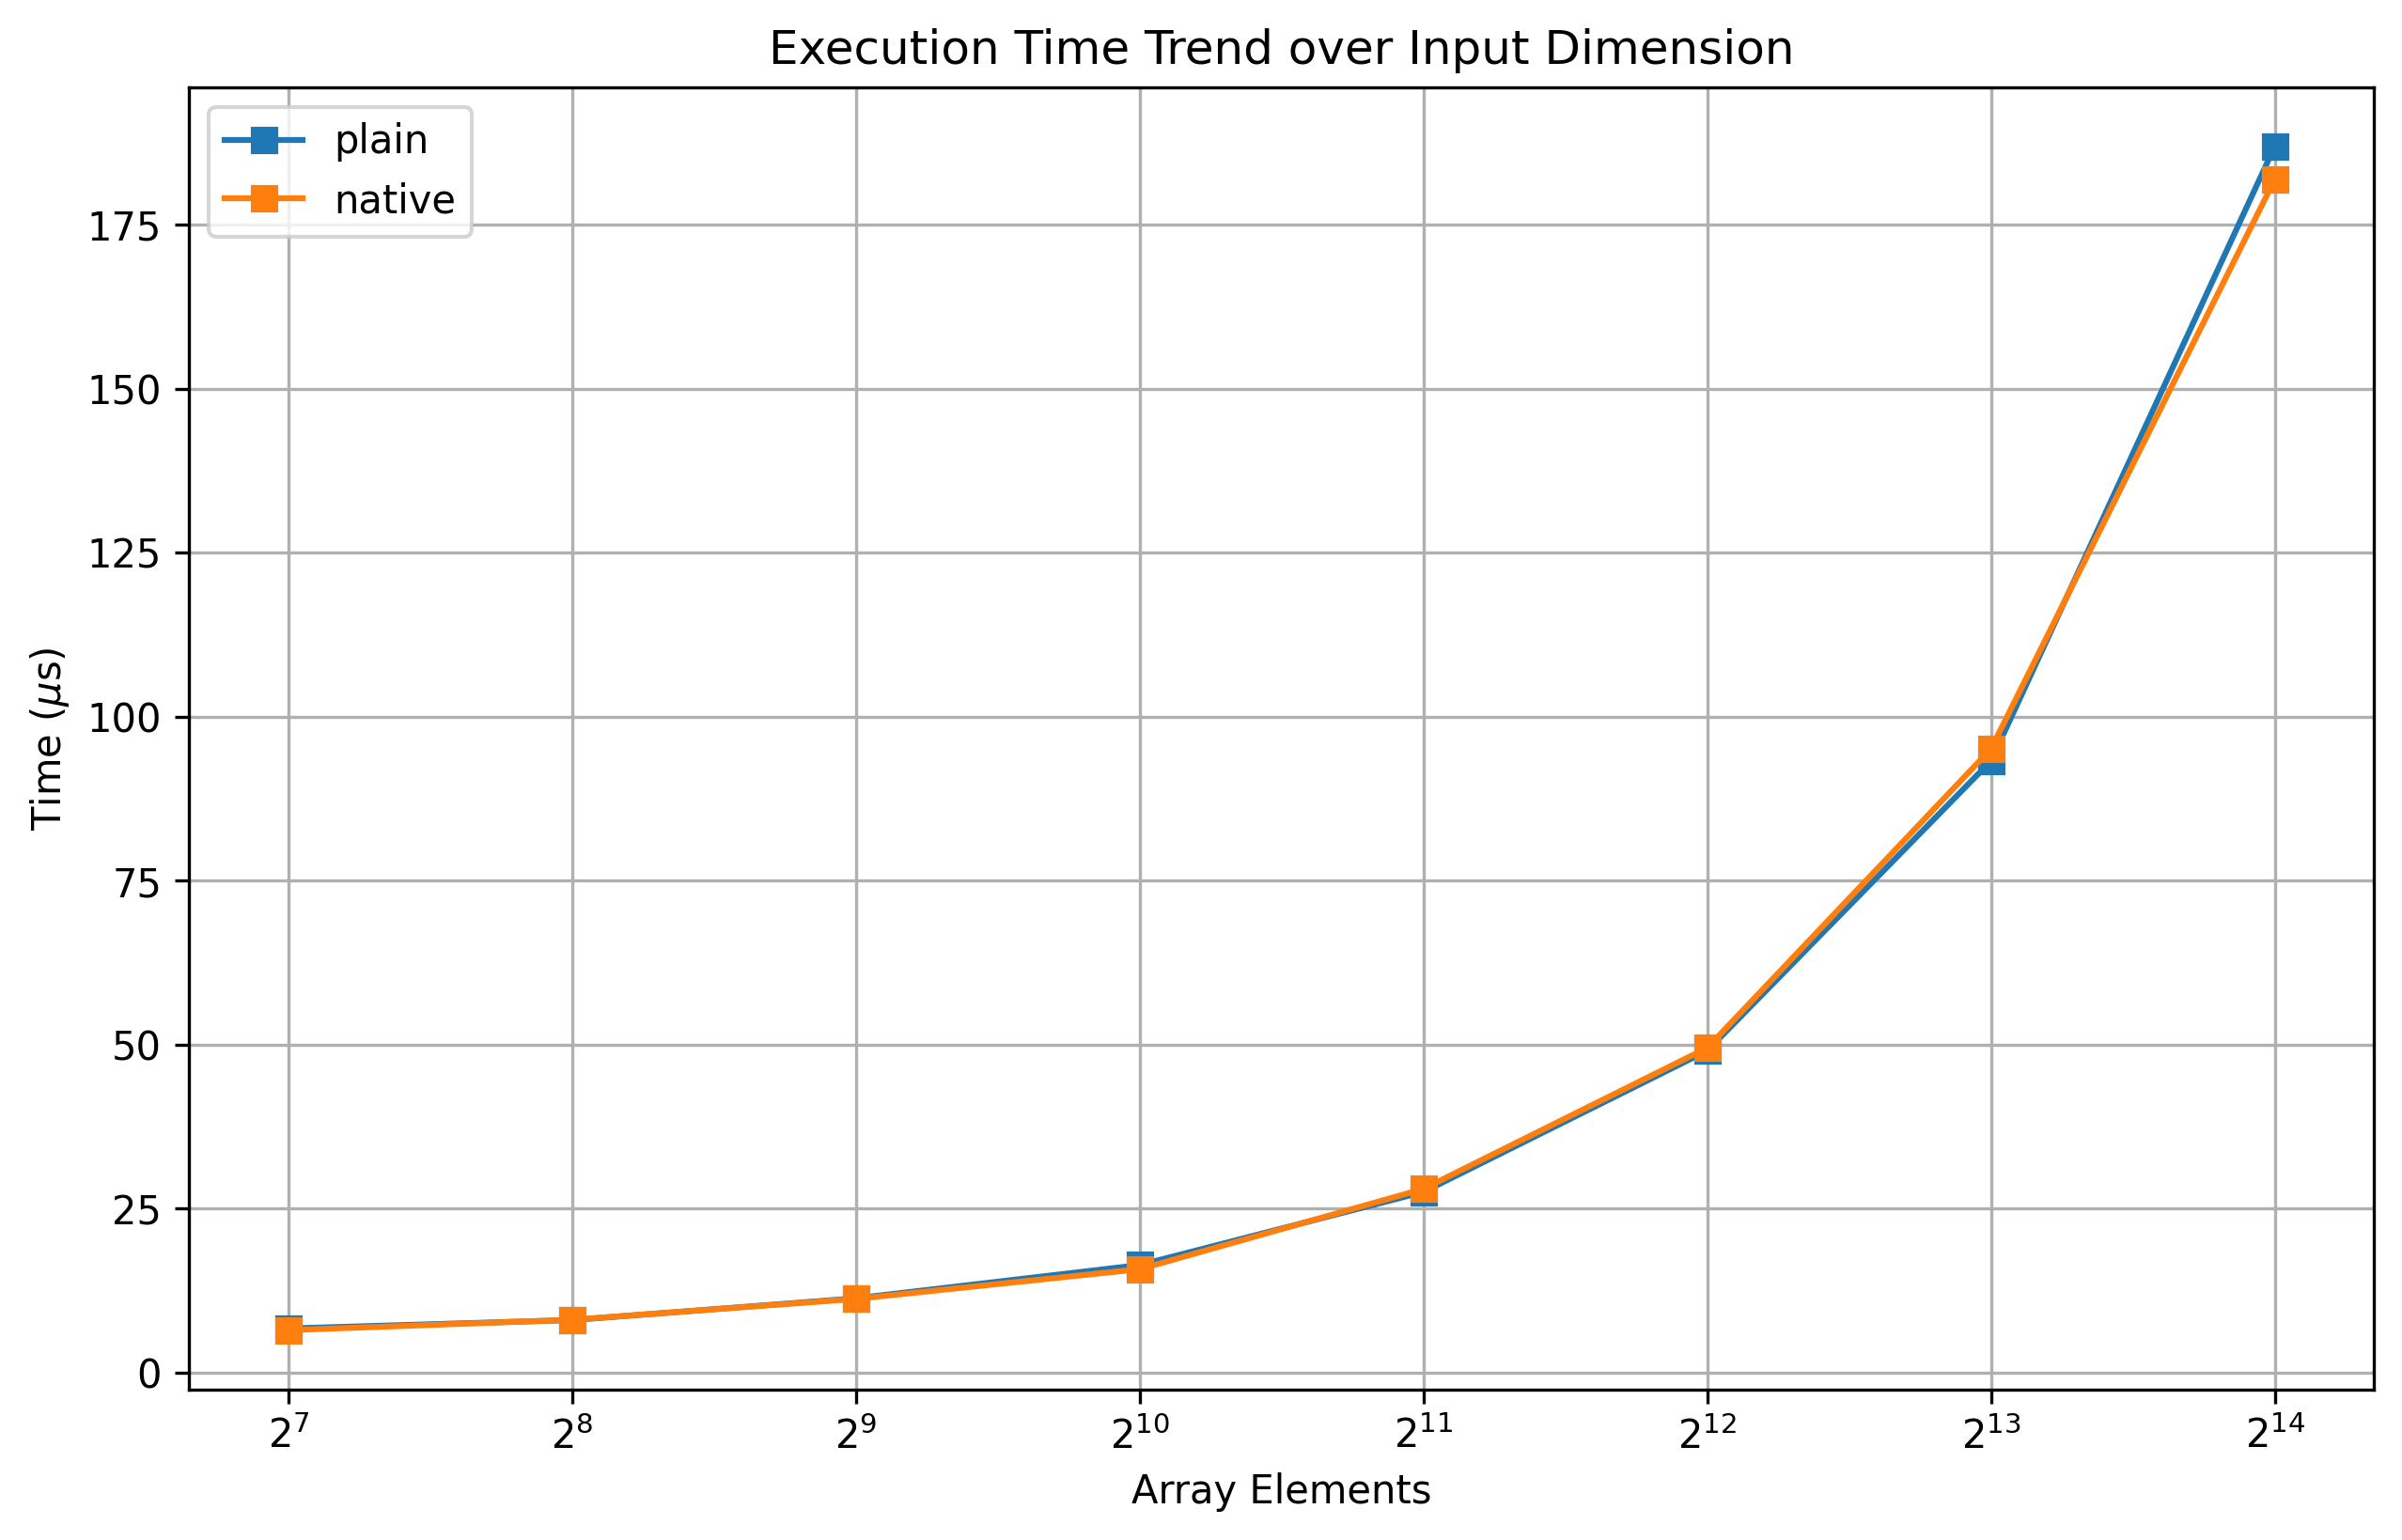

In [2]:
import matplotlib.pyplot as plt


def plot_time(df: pd.DataFrame, labels: list[str]):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.title("Execution Time Trend over Input Dimension")
    
    for label in labels:
        plt.plot(df["elements"], df[label], marker="s", label=label)

    plt.xlabel("Array Elements")
    plt.ylabel(r"Time ($\mu$s)")

    plt.xscale("log", base=2)
    plt.grid()
    plt.legend()
    plt.savefig("time.svg")
    plt.show()


plot_time(df, ["plain", "native"])

In [3]:
df["native_su"] = df["plain"] / df["native"]
df

,elements,plain,native,native_su
0,128,6.75334,6.49826,1.039254
1,256,8.03948,8.08802,0.993999
2,512,11.35570,11.26710,1.007864
3,1024,16.42310,15.79350,1.039865
4,2048,27.56460,28.03550,0.983203
5,4096,49.09190,49.52620,0.991231
6,8192,93.25750,95.08950,0.980734
7,16384,186.93200,181.87900,1.027782


In [4]:
print(
    df[["elements", "plain", "native"]].to_latex(
        header=True, index=False, float_format="%.4f"
    )
)

\begin{tabular}{rrr}
\toprule
elements & plain & native \\
\midrule
128 & 6.7533 & 6.4983 \\
256 & 8.0395 & 8.0880 \\
512 & 11.3557 & 11.2671 \\
1024 & 16.4231 & 15.7935 \\
2048 & 27.5646 & 28.0355 \\
4096 & 49.0919 & 49.5262 \\
8192 & 93.2575 & 95.0895 \\
16384 & 186.9320 & 181.8790 \\
\bottomrule
\end{tabular}



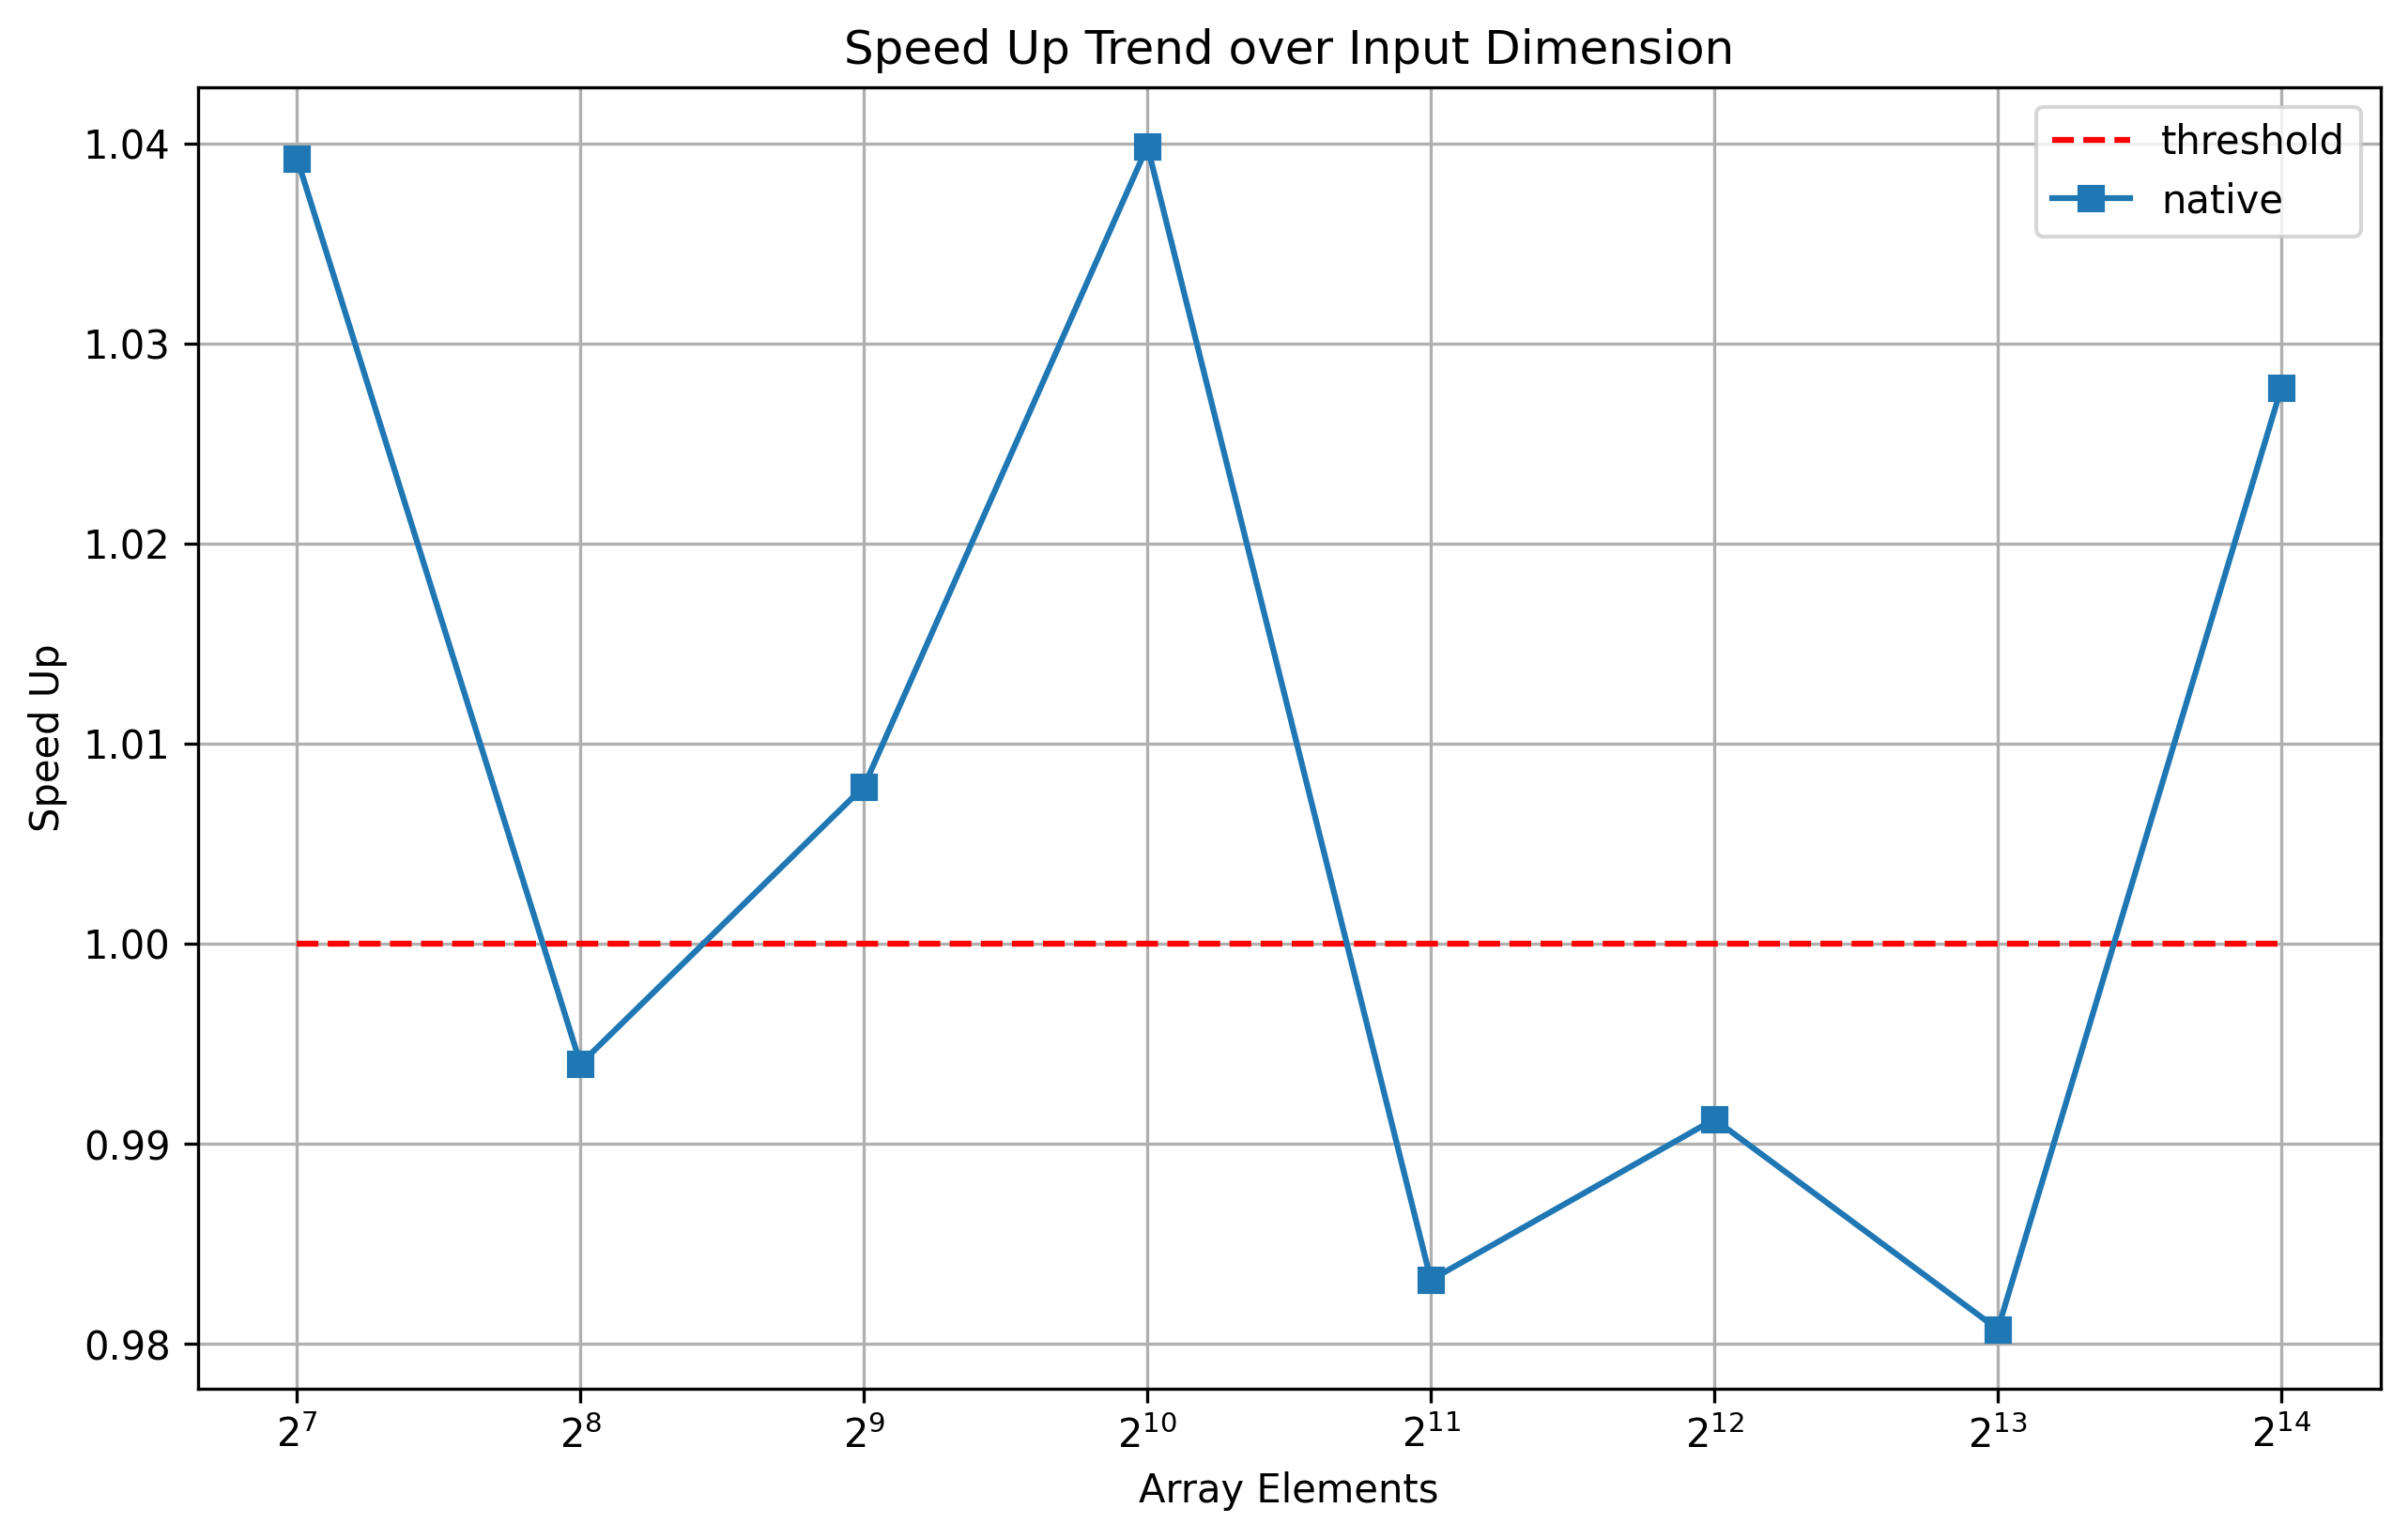

In [5]:
def plot_speedup(df: pd.DataFrame, labels: list[str]):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.title("Speed Up Trend over Input Dimension")

    # threshold of good speed up
    plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")
    
    for label in labels:
        plt.plot(df["elements"], df[f"{label}_su"], marker="s", label=label)

    plt.xlabel("Array Elements")
    plt.ylabel(r"Speed Up")

    plt.xscale("log", base=2)
    plt.grid()
    plt.legend()
    plt.savefig("speed_up.svg")
    plt.show()


plot_speedup(df,["native"])